In [7]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
from scipy.interpolate import griddata

In [2]:
data = pd.read_csv('5cxj_dft.csv')

In [6]:
E = data['r_dft_energy']
torsion_1 = data['s_torsion_angle_1'] + 180
torsion_2 = data['s_torsion_angle_2'] + 180

In [20]:
generated = pd.read_csv('Trial_1_FF_torsion.csv')
gen_conf_t1 = generated['s_torsion_angle_1'] + 180
gen_conf_t2 = generated['s_torsion_angle_2'] + 180

In [21]:
generated = list(range(361))
x1 = generated
y1 = generated
x_grid, y_grid = np.meshgrid(x1,y1)
z_grid = griddata((torsion_1,torsion_2),E,(x_grid,y_grid),method='cubic')

In [22]:
gen_conf_E = []
for i in range(len(gen_conf_t1)):
    x_index = gen_conf_t1[i]
    y_index = gen_conf_t2[i]
    gen_conf_E.append(z_grid[y_index][x_index])

In [23]:
fig = go.Figure(go.Surface(x=x_grid,y=y_grid,z=z_grid,
                       colorscale='viridis',opacity=0.6))

fig.add_scatter3d(x=gen_conf_t1, y=gen_conf_t2, z = gen_conf_E, mode='markers', 
                  marker=dict(size=5,colorscale='Reds'))

fig.update_scenes(xaxis_visible=False,yaxis_visible=False,zaxis_visible=False)
#fig.show()
fig.write_html('PES.html')

In [17]:
#测试代码
x_index = 1
y_index = 0
print('x:',x_grid[y_index][x_index])
print('y:',y_grid[y_index][x_index])
print('E:',z_grid[y_index][x_index])

x: 1
y: 0
E: 1.3333089867693746


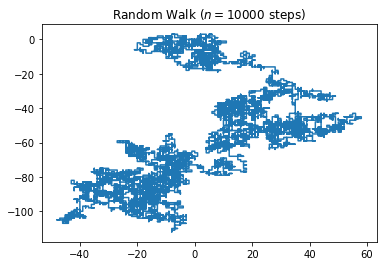

In [7]:
import numpy
import pylab
import random
 
# defining the number of steps
n = 10000
 
#creating two array for containing x and y coordinate
#of size equals to the number of size and filled up with 0's
x = numpy.zeros(n)
y = numpy.zeros(n)
 
# filling the coordinates with random variables
for i in range(1, n):
    val = random.randint(1, 4)
    if val == 1:
        x[i] = x[i - 1] + 1
        y[i] = y[i - 1]
    elif val == 2:
        x[i] = x[i - 1] - 1
        y[i] = y[i - 1]
    elif val == 3:
        x[i] = x[i - 1]
        y[i] = y[i - 1] + 1
    else:
        x[i] = x[i - 1]
        y[i] = y[i - 1] - 1
     
 
# plotting stuff:
pylab.title("Random Walk ($n = " + str(n) + "$ steps)")
pylab.plot(x, y)
pylab.savefig("rand_walk"+str(n)+".svg",bbox_inches="tight")
pylab.show()